In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
sns.set_theme(style="darkgrid")

In [2]:
cust_acq = pd.read_csv('Customer Acqusition.csv')
repayment = pd.read_csv('Repayment.csv', parse_dates=[2], infer_datetime_format=True)
spend = pd.read_csv('Spend.csv', parse_dates=[2], infer_datetime_format=True)

In [3]:
cust_acq.head()

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary


In [4]:
repayment.head()

,SL No:,Customer,Month,Amount,Unnamed: 4
0,1.0,A1,2004-01-12,495414.75,NaN
1,2.0,A1,2004-01-03,245899.02,NaN
2,3.0,A1,2004-01-15,259490.06,NaN
3,4.0,A1,2004-01-25,437555.12,NaN
4,5.0,A1,2005-01-17,165972.88,NaN


In [5]:
repayment.drop(repayment.columns[-1], axis=1, inplace=True)

In [6]:
repayment=repayment[~repayment['SL No:'].isna()]
repayment['SL No:'] = repayment['SL No:'].astype('int32')
repayment.head()

,SL No:,Customer,Month,Amount
0,1,A1,2004-01-12,495414.75
1,2,A1,2004-01-03,245899.02
2,3,A1,2004-01-15,259490.06
3,4,A1,2004-01-25,437555.12
4,5,A1,2005-01-17,165972.88


In [7]:
spend.head()

,Sl No:,Customer,Month,Type,Amount
0,1,A1,2004-01-12,JEWELLERY,485470.80
1,2,A1,2004-01-03,PETRO,410556.13
2,3,A1,2004-01-15,CLOTHES,23740.46
3,4,A1,2004-01-25,FOOD,484342.47
4,5,A1,2005-01-17,CAMERA,369694.07


### In case age is less than 18, replace it with mean of age values.

In [8]:
cust_acq.Age.mask(cust_acq.Age<18, int(cust_acq.Age.mean()), inplace=True)

### In case spend amount is more than the limit, replace it with 50% of that customer’s limit

In [9]:
spend=pd.merge(spend, cust_acq[['Customer', 'Limit']])

In [10]:
spend.Amount.mask(spend.Amount>spend.Limit, spend.Limit/2, inplace=True)

### Incase the repayment amount is more than the limit, replace the repayment with the limit.

In [11]:
repayment=pd.merge(repayment, cust_acq[['Customer', 'Limit']])

In [12]:
repayment.Amount.mask(repayment.Amount>repayment.Limit, repayment.Limit, inplace=True)

## A few simple summaries:

In [13]:
# Count of distinct customers
cust_acq.Customer.nunique()

100

In [14]:
# Distinct categories 
cust_acq.select_dtypes('object').columns

Index(['Customer', 'City', 'Product', 'Company', 'Segment'], dtype='object')

In [15]:
cust_acq[['City', 'Product', 'Company', 'Segment']]=cust_acq[['City', 'Product', 'Company', 'Segment']].astype('category')

In [16]:
len(cust_acq.select_dtypes('category').columns)

4

In [17]:
# Average monthly spend by customers
spend.groupby([spend.Month.apply(lambda x: x.year), spend.Month.apply(lambda x: x.month)])['Amount'].sum().mean()

7326036.174333333

In [18]:
# Average monthly repayment by customers
repayment.groupby([repayment.Month.apply(lambda x: x.year), repayment.Month.apply(lambda x: x.month)])['Amount'].sum().mean()

8166078.6696666675

### Profit for the bank for each month, if the monthly rate of interest is 2.9%

In [19]:
repayment.sort_values(by='Month', inplace=True, ignore_index=True)
spend.sort_values(by='Month', inplace=True, ignore_index=True)

In [20]:
monthly_spend=spend.groupby([spend.Month.apply(lambda x: x.year), spend.Month.apply(lambda x: x.month)])['Amount'].sum()

In [21]:
monthly_repay=repayment.groupby([repayment.Month.apply(lambda x: x.year), repayment.Month.apply(lambda x: x.month)])['Amount'].sum()

In [23]:
# Profit is defined as interest earned on Monthly Profit. Monthly Profit = Monthly repayment – Monthly spend. 
# Interest is earned only on positive profits and not on negative amounts

monthly_profit=monthly_repay-monthly_spend
monthly_profit[monthly_profit>0]*2.9/100

Month  Month
2004   1         14854.05404
       3         23043.57255
       4         51607.36760
       5         47449.29395
       11        19528.87637
2005   5        265963.41583
       7          3134.77994
       8         45866.50701
       10        10930.31228
       12        28060.53369
2006   1         15795.98796
       2         32004.72132
       3         87247.51848
       4        103870.19639
       5        198756.47002
       7         29033.92478
       9         11449.36704
       10         1085.96445
       12         9050.79038
Name: Amount, dtype: float64

In [24]:
# Top 5 product types?
spend.Type.value_counts().head(5)

PETRO           200
FOOD            160
CAMERA          160
AIR TICKET      147
TRAIN TICKET    132
Name: Type, dtype: int64

In [25]:
# City with maximum spend
spend=pd.merge(spend, cust_acq[['Customer', 'City']])
spend.head()

,Sl No:,Customer,Month,Type,Amount,Limit,City
0,544,A20,2004-01-03,PETRO,5000.5,10001.0,CALCUTTA
1,326,A20,2004-01-03,FOOD,5000.5,10001.0,CALCUTTA
2,430,A20,2004-01-12,BUS TICKET,5000.5,10001.0,CALCUTTA
3,506,A20,2004-01-25,CAMERA,5000.5,10001.0,CALCUTTA
4,344,A20,2004-03-19,AIR TICKET,5000.5,10001.0,CALCUTTA


In [26]:
spend.groupby('City')['Amount'].sum().sort_values(ascending=False)

City
COCHIN        45963513.50
CALCUTTA      41108132.30
BANGALORE     40461647.02
BOMBAY        28603127.38
CHENNAI       22128635.65
TRIVANDRUM    15337155.87
PATNA         15260586.97
DELHI         10918286.54
Name: Amount, dtype: float64

### The age group spending more money

In [176]:
spend=pd.merge(spend, cust_acq[['Customer', 'Age']])

In [189]:
spend['Age_group']=pd.cut(spend.Age, np.arange(18,80,3))

In [191]:
spend.groupby('Age_group')['Amount'].sum().sort_values(ascending=False)

Age_group
(45, 48]    29398555.29
(27, 30]    25596877.49
(36, 39]    21760510.27
(48, 51]    19259879.49
(75, 78]    18818983.07
(42, 45]    14254764.71
(33, 36]    14253307.44
(24, 27]    12412524.14
(51, 54]    11468563.54
(66, 69]     8712396.93
(69, 72]     7991284.88
(18, 21]     7732261.39
(57, 60]     7253819.51
(21, 24]     6948235.19
(60, 63]     5328137.46
(39, 42]     3805971.17
(30, 33]     1315495.87
(54, 57]     1309694.35
(72, 75]     1049576.19
(63, 66]      205726.16
Name: Amount, dtype: float64

In [27]:
# Top 10 customers in terms of repayment
repayment.sort_values(by='Amount', ascending=False)['Customer'].head(10).values

array(['A11', 'A40', 'A13', 'A12', 'A40', 'A89', 'A12', 'A27', 'A30',
       'A62'], dtype=object)

###  The city wise spend on each product on yearly basis. Along with a graphical representation for the same.

In [28]:
spend.groupby(['City','Type',])['Amount'].sum()

City        Type        
BANGALORE   AIR TICKET      4033800.42
            AUTO             964325.11
            BIKE             878537.74
            BUS TICKET      3335380.60
            CAMERA          4192273.11
                               ...    
TRIVANDRUM  PETRO           1816444.58
            RENTAL          1130264.16
            SANDALS          551567.65
            SHOPPING        1118407.84
            TRAIN TICKET     716997.11
Name: Amount, Length: 120, dtype: float64

In [29]:
spend.Type.unique()

array(['PETRO', 'FOOD', 'BUS TICKET', 'CAMERA', 'AIR TICKET',
       'MOVIE TICKET', 'TRAIN TICKET', 'BIKE', 'CAR', 'JEWELLERY',
       'SANDALS', 'SHOPPING', 'CLOTHES', 'AUTO', 'RENTAL'], dtype=object)

In [30]:
spend.City.unique()

[CALCUTTA, COCHIN, DELHI, CHENNAI, PATNA, BOMBAY, BANGALORE, TRIVANDRUM]
Categories (8, object): [CALCUTTA, COCHIN, DELHI, CHENNAI, PATNA, BOMBAY, BANGALORE, TRIVANDRUM]

In [31]:
spend.rename(columns={'Month': 'Date'}, inplace=True)

In [32]:
spend['Month']=spend.Date.apply(lambda x: x.strftime('%B'))
spend['Year']=spend.Date.apply(lambda x: x.strftime('%Y'))

In [33]:
spend.rename(columns={'Type': 'Product'}, inplace=True)

In [34]:
q3=pd.pivot_table(spend, values='Amount', index=['Year','Month','City'],columns=['Product'], aggfunc=np.sum).fillna(0).stack().reset_index()

In [35]:
q3.rename(columns={q3.columns[-1]: 'Amount'}, inplace=True)

In [36]:
q3

,Year,Month,City,Product,Amount
0,2004,April,BANGALORE,AIR TICKET,0.00
1,2004,April,BANGALORE,AUTO,0.00
2,2004,April,BANGALORE,BIKE,0.00
3,2004,April,BANGALORE,BUS TICKET,133410.25
4,2004,April,BANGALORE,CAMERA,0.00
...,...,...,...,...,...
3175,2006,September,TRIVANDRUM,PETRO,0.00
3176,2006,September,TRIVANDRUM,RENTAL,0.00
3177,2006,September,TRIVANDRUM,SANDALS,0.00
3178,2006,September,TRIVANDRUM,SHOPPING,0.00


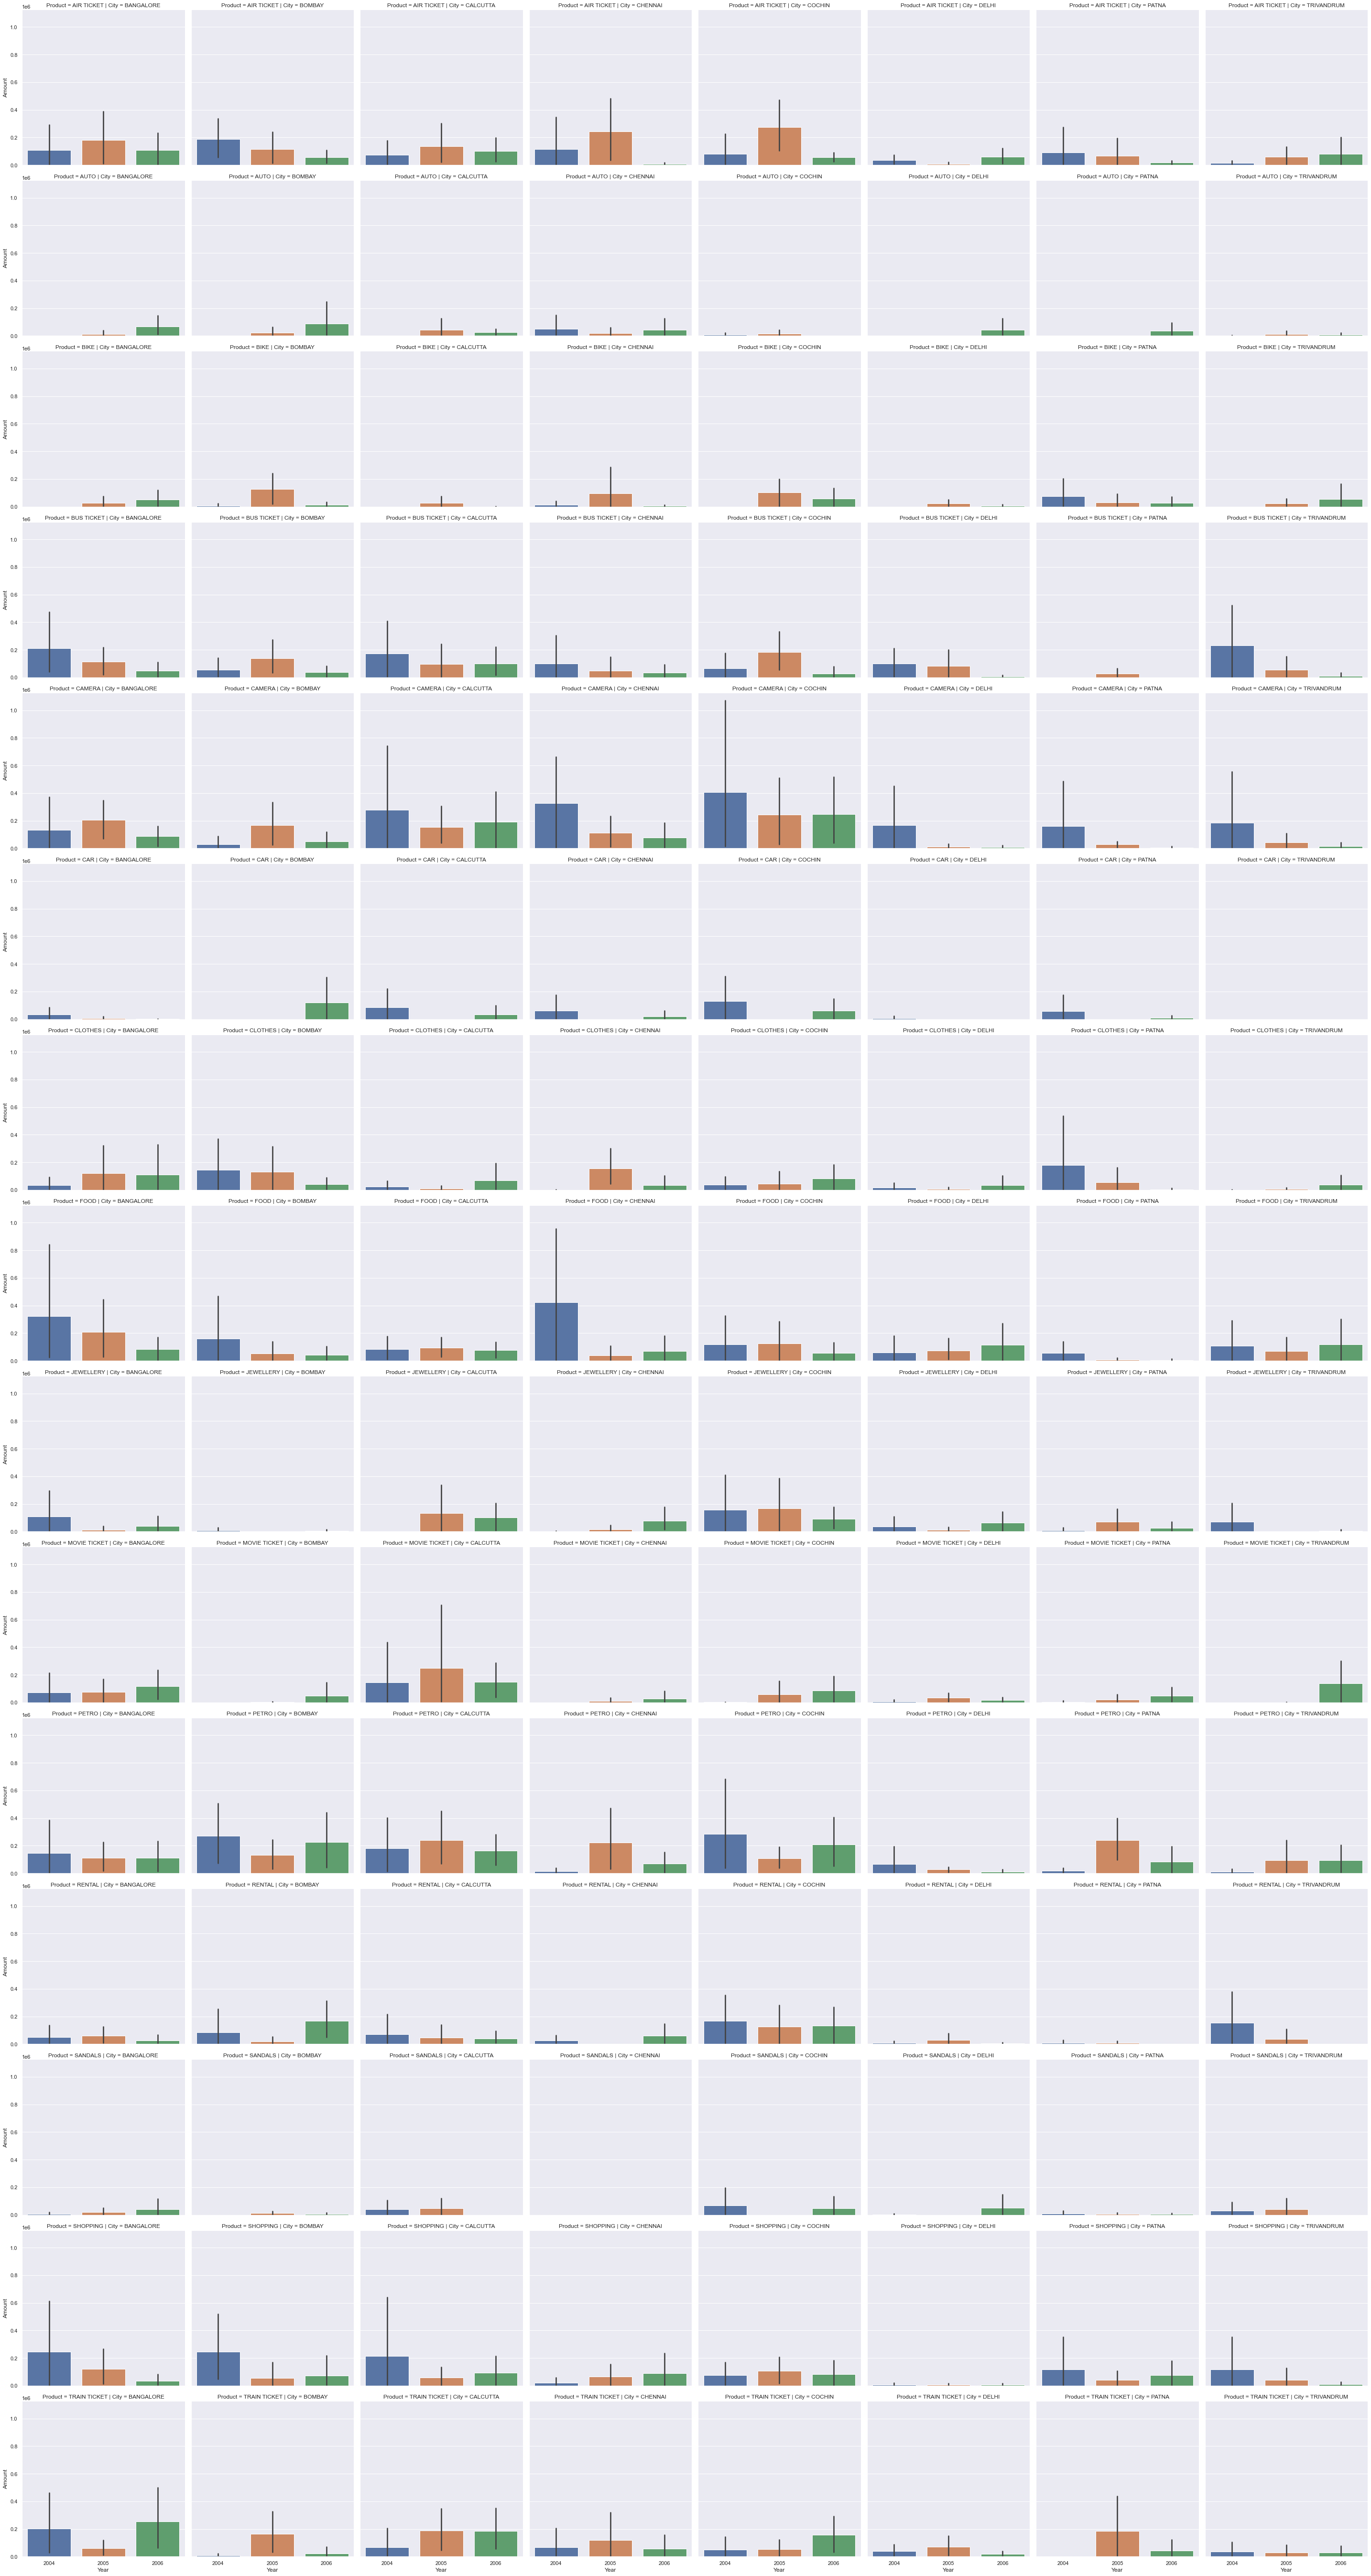

In [37]:
q3_plot=sns.catplot(x='Year',y='Amount',data=q3,kind='bar',row='Product',col='City');
q3_plot.set_yticklabels=np.linspace(0,3500000,6);


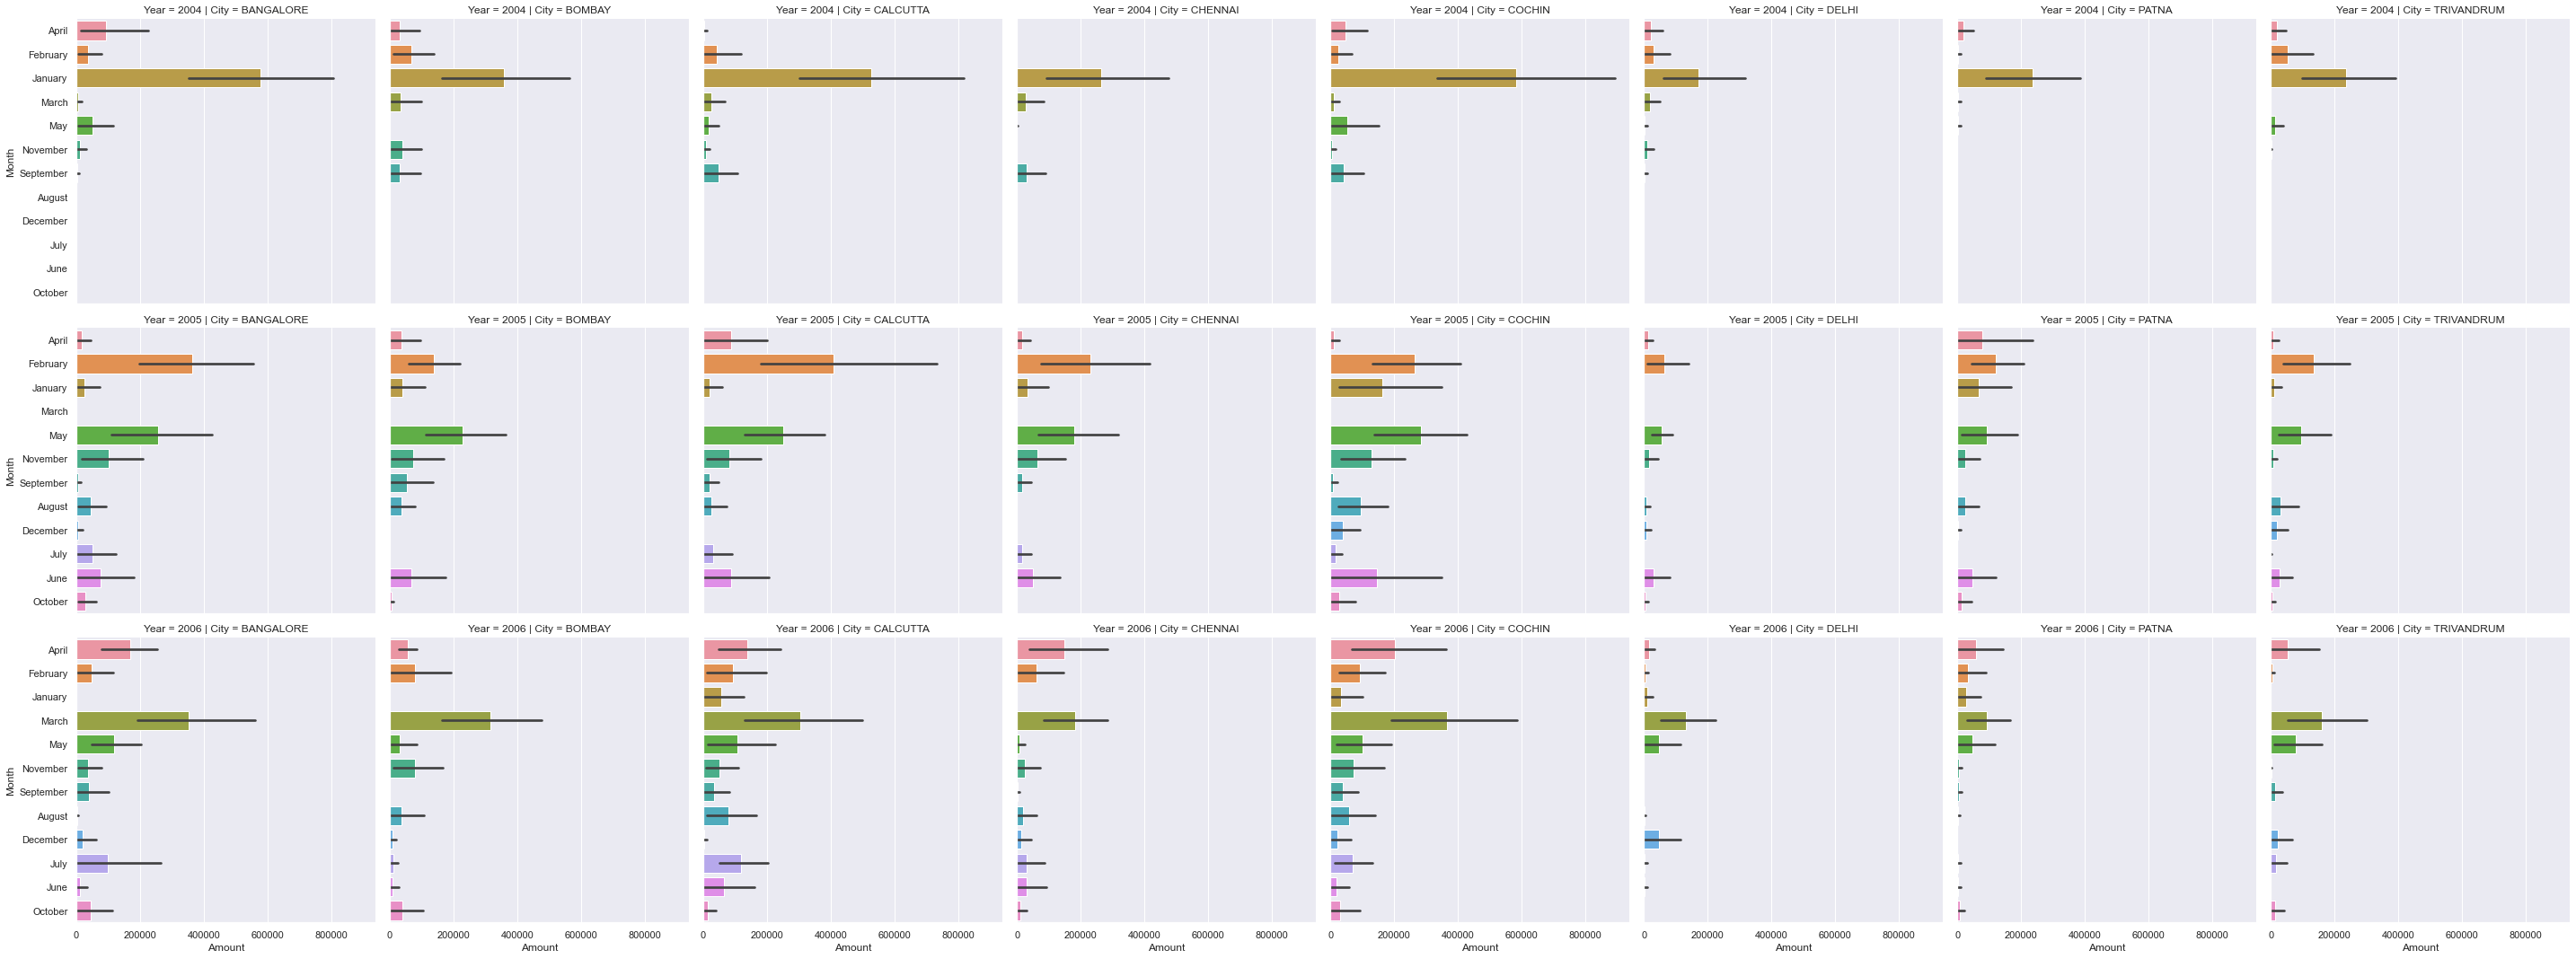

In [39]:
# Monthly comparison of total spends, city wise
sns.catplot(y='Month',x='Amount',data=q3,kind='bar',row='Year',col='City')
plt.show()

## A few more graphs:

In [40]:
q4=spend.groupby('Year')['Amount'].sum().reset_index()

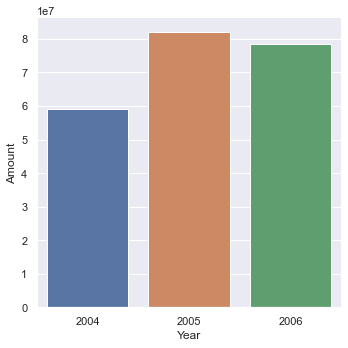

In [41]:
# Comparison of yearly spend on air tickets
sns.catplot(x='Year',y='Amount', data=q4, kind='bar');

In [42]:
q5=spend.groupby(['Month','Product'])['Amount'].sum().reset_index()

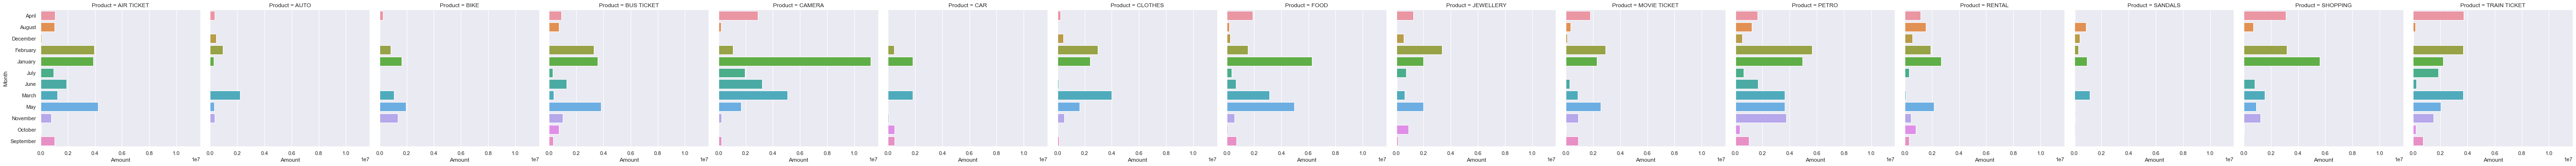

In [43]:
# Comparison of monthly spend for each product
sns.catplot(y='Month',x='Amount', data=q5, kind='bar', col='Product')
plt.show()

## A little user driven summary

In [68]:
df=repayment.merge(cust_acq[['Customer','Product']],on="Customer")
df.rename(columns={'Month':'Date'}, inplace=True)

In [84]:
df['Month']=df.Date.apply(lambda x: x.strftime("%B"))
df['Year']=df.Date.apply(lambda x: x.year)

In [91]:
import calendar
months=list(calendar.month_name)[1:]

In [101]:
print(months)
month=input('Please enter one of the months: ')
print(list(df.Product.unique()))
prod=input('Please enter one of the product categories: ')

['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
Please enter one of the months: May
['Silver', 'Platimum', 'Gold']
Please enter one of the product categories: Platimum


In [104]:
df[(df.Month==month)&(df.Product==prod)].groupby('Customer')['Amount'].sum().sort_values(ascending=False).head(10)

Customer
A41    1999863.05
A39    1668976.58
A40    1401293.97
A38     981011.33
A56     708576.18
A54     494339.29
A55     409413.63
A50     308304.43
A37     244585.08
A53     200006.00
Name: Amount, dtype: float64

In [105]:
import ipywidgets as widgets

In [125]:
m_or_y = widgets.Dropdown(options=['Monthly','Yearly'],value='Yearly',description='Monthly or Yearly: ',disabled=False)
month = widgets.Dropdown(options=months,value='May',description='Month: ',disabled=False)
year = widgets.Dropdown(options=[2004, 2005, 2006],value=2004,description='Year: ',disabled=False)
prod = widgets.Dropdown(options=list(df.Product.unique()),value='Silver',description='Product: ',disabled=False)

## Top 10 customers by repayment amount, based on the following parameters

In [143]:
prod

Dropdown(description='Product: ', index=1, options=('Silver', 'Platimum', 'Gold'), value='Platimum')

In [144]:
m_or_y

Dropdown(description='Monthly or Yearly: ', index=1, options=('Monthly', 'Yearly'), value='Yearly')

In [145]:
month

Dropdown(description='Month: ', index=4, options=('January', 'February', 'March', 'April', 'May', 'June', 'Jul…

In [146]:
year

Dropdown(description='Year: ', options=(2004, 2005, 2006), value=2004)

#### Rerun the cell below, each time after changing the parameters:

In [158]:
def top10():
    if (m_or_y.value == 'Monthly'):
        print("Top 10 customers by repayment,",year.value,"",month.value)
        print(df[(df.Product==prod.value)&(df.Year==year.value)&(df.Month==month.value)].groupby('Customer')['Amount'].sum().sort_values(ascending=False).head(10))
    else:
        print("Top 10 customers by repayment, ",year.value)
        print(df[(df.Product==prod.value)&(df.Year==year.value)].groupby('Customer')['Amount'].sum().sort_values(ascending=False).head(10))

top10()

Top 10 customers by repayment,  2005
Customer
A39    3699578.97
A40    2527720.55
A41    2486187.34
A38    2408626.65
A54    1829813.48
A37    1031641.04
A56     966666.69
A36     856921.95
A52     769849.81
A55     708035.12
Name: Amount, dtype: float64
